Como hace mucho que no programo con estas librerías quiero que me quede claro. Por tanto, voy a explicar todo a cada detalle.

In [ ]:
import numpy as np # libreria para el procesamiento numerico

**Numpy** ofrece un potente conjunto de herramientas y estructuras de datos para trabajar con arreglos multidimensionales y realizar operaciones matemáticas avanzdas de manera eficiente.
  
  - Estructura "arreglo": permite almacenar datos de manera eficiente en forma de matrices multidimensionales.
  - Operaciones matemáticas y estadísticas
  - Indexaciones y segmentación
  - Broadcasting

In [ ]:
import scipy as sc # añade y extiende las funcionalidades de numpy

**SciPy** ofrece un conjunto de herramientas más amplio que incluye algoritmos y funciones especializadas para tareas como optimización, interpolación, integración numérica, procesamiento de señales, estadísticas y mucho más.

In [ ]:
import matplotlib.pyplot as plt # graficos


from sklearn.datasets import make_circles

CREAR DATASET
Para eso vamos hacer uso de la funcion make_circles

In [ ]:
make_circles? # nos da info de la funcion

SyntaxError: invalid syntax (<ipython-input-4-c51685277037>, line 1)

(500, 1)


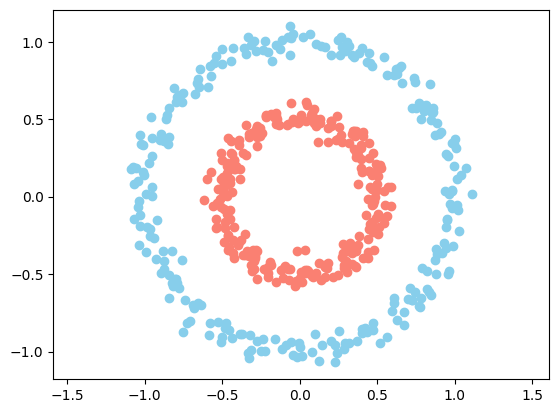

In [ ]:
n = 500   # numero de registros
p = 2     # cuantas caracteristicas tenemos de cada uno de los registros de nuestros datos

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
# print(Y)
# X -> the generated samples. Dataset que estamos utilizando como parametro de entrada.
# Y -> the int label (0 or 1) for class class of each sample.

Y = Y[:, np.newaxis]
print(Y.shape)

plt.scatter(X[Y[:,0] == 0 ,0], X[ Y[:,0] == 0,1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1 ,0], X[ Y[:,0] == 1,1], c = "salmon")
plt.axis("equal")
plt.show()

Vamos a definir una clase con la que podemos crear capas para nuestra red

In [ ]:
# CLASE DE LA CAPA DE LA RED
class neural_layer():
  def __init__(self,n_conn, n_neur, act_f ): # n_conn : numero de conexiones ;  n_neur : numero de neuronas ; act_f : funcion de activacion
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1 # random nos devuelve un numero entre 0 y 1, pero le multiplicamos x2 y -1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

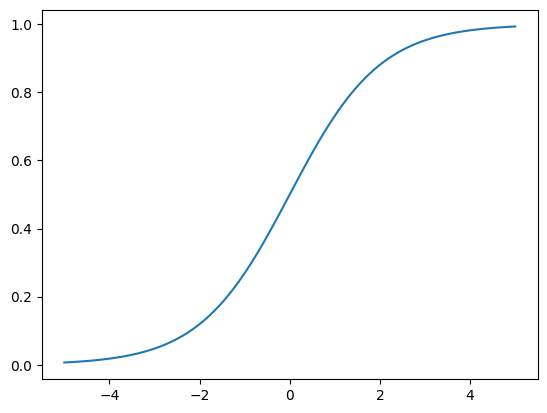

In [ ]:
# FUNCIONES DE ACTIVACION

# sigmoide
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1-x))

# ReLU
relu = lambda x: np.maximum(0, x)



_x = np.linspace(-5, 5, 100) # es un vector de 100 valores que van de -5 a 5
plt.plot(_x, sigm[0](_x))
# plt.plot(_x, relu(_x))

Entonces, la red implementa backpropagation. En esta calculara las derivadas parciales utilizando la funcion de activacion.
Por tanto, vamos a aprovechar para realizarla en funcion.

In [ ]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

# definimos funcion que se encarga de crear nuestra red neuronal en funcion de una variable

def create_nn(topology, act_f):
  nn = []
  for l,layer in enumerate(topology[:-1]): # enumerate me da tanto el indice como el
    nn.append(neural_layer(topology[l], topology[l+1],act_f))
  return nn

Hasta ahora tenemos la estructura de datos que soporta la red neuronal creada.
Pero de momneto no hemos implmentado nada de la lógica.
Vamos a pasar a ello.

Recordemos la manera de entrenar una red neuronal, son 3 fases fundamentales:

1. Paso hacia delante (forwardpropagation): la red va a procesar hacia delante, hasta llegar al final y escupir un valor. Ese valor se irá acercando al valor que queremos.

2. Mirar cuánto difiere con el valor real, el valor obtenido. Esto haremos con el valor de coste. Y calcularemos el error.

3. Haremos backpropagation para calcular las derivadas parciales las que nos van a permitir calcular el descenso del grandiente el cual nos optimizará a nuestra red.

In [ ]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):
    # @ -> multiplicacion matricial
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  if train:
    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      #print(a.shape)

      if l == len(neural_net) - 1:
        # calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        # calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T* neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      # print(out[l][1].shape, deltas[0].shape)
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr


    return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

In [ ]:
import time
from IPython.display import clear_output

In [ ]:
neural_n = create_nn(topology, sigm)

loss = []

for i in range(1000):
  # entrenamos la red
  pY = train(neural_n, X, Y, l2_cost, lr=0.001)

  if i % 25 == 0:

    # print(pY)

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")


    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

TypeError: 'NoneType' object is not subscriptable